In [1]:
AUDIO_URL_OR_FP = 'https://www.youtube.com/watch?v=0jXXWBt5URw'
START_TIME = 35
END_TIME = 45

In [2]:
# Load audio

from wavegenie.audio_io import load_audio, save_wav
from wavegenie.util import preview_audio, DDSP_DEFAULT_FS_AUDIO

audio, fs = load_audio(
    AUDIO_URL_OR_FP,
    DDSP_DEFAULT_FS_AUDIO,
    num_channels=1,
    normalize=True,
    start_time_seconds=START_TIME,
    end_time_seconds=END_TIME)

preview_audio(audio)
save_wav('input_16k_mono_f32.wav', audio, DDSP_DEFAULT_FS_AUDIO)

/u/nlp/anaconda/main/anaconda3/envs/ddsp-rod/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/u/nlp/anaconda/main/anaconda3/envs/ddsp-rod/lib/python3.7/site-packages/librosa/core/time_frequency.py:1208: RuntimeWarning: divide by zero encountered in log10
  - 0.5 * np.log10(f_sq + const[3]))


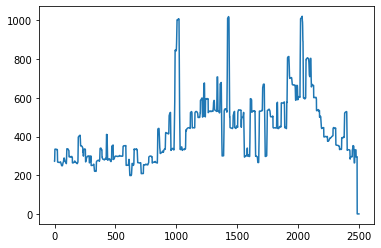

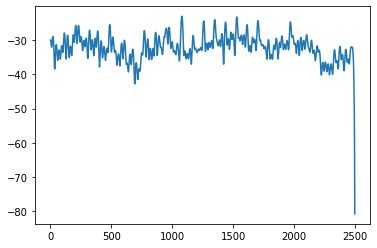

In [3]:
# Extract synthesis parameters

import matplotlib.pyplot as plt

from wavegenie.util import extract_ddsp_synthesis_parameters

audio_parameters = extract_ddsp_synthesis_parameters(audio)

plt.plot(audio_parameters['f0_hz'])
plt.show()
plt.plot(audio_parameters['loudness_db'])
plt.show()

In [4]:
# Load model

from wavegenie.util import load_ddsp_model

model = load_ddsp_model('Violin')

In [9]:
audio_parameters['f0_hz']

array([272.43436, 272.69595, 308.82   , ...,   0.     ,   0.     ,
         0.     ], dtype=float32)

In [12]:
audio_parameters['loudness_db']

array([-29.94872 , -29.972803, -30.044952, ..., -59.97099 , -67.62282 ,
       -80.78065 ], dtype=float32)

In [13]:
model

('/juice/scr/rjcaste/curis/wavegenie/params/ddsp_official/Violin',
 '/juice/scr/rjcaste/curis/wavegenie/params/ddsp_official/Violin/operative_config-0.gin',
 '/juice/scr/rjcaste/curis/wavegenie/params/ddsp_official/Violin/ckpt-38100')

In [5]:
# Resynthesize parameters

from wavegenie.util import synthesize_ddsp_audio

resynth = synthesize_ddsp_audio(model, audio_parameters)

preview_audio(resynth)
save_wav('output_16k_mono_f32.wav', resynth, DDSP_DEFAULT_FS_AUDIO)

('f0_scaled', 'ld_scaled')
[TensorShape([1, 2500, 1]), TensorShape([1, 2500, 1])]
ListWrapper([<tensorflow.python.keras.engine.sequential.Sequential object at 0x7f107c129630>, <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f107c0be5f8>])
tf.Tensor(
[[[-0.01963497 -0.00567652 -0.26753005 ... -0.7914457  -0.00261595
    0.00574401]
  [-0.01960674 -0.00589055 -0.26744416 ... -0.79100513 -0.00263441
    0.00555822]
  [-0.01277112 -0.02340279 -0.25365222 ... -0.7194379  -0.00432131
   -0.00221727]
  ...
  [-0.02087152  0.8879765  -0.20064965 ... -0.67602456 -0.02095522
   -0.01540469]
  [-0.02087152  0.8879765  -0.20064965 ... -0.67602456 -0.02095522
   -0.01540469]
  [-0.02087152  0.8879765  -0.20064965 ... -0.67602456 -0.02095522
   -0.01540469]]], shape=(1, 2500, 512), dtype=float32)
